# Study Analysis on Diabetes and COVID-19

During the pandemic, people of elderly age as well as Diabetics were in danger of grave consequences from COVID-19. For this study, data visualizations will be used to show how Diabetic patients are at a greater risk than healthy people of dying or getting lifelong complications from COVID-19.  We will take a look at factors suchs as glucose numbers, blood pressure, and other vitals to show how susceptible they were to COVID.

In [1]:
# importing modules
"""
    pandas: used to manipulate and plot CSV data
    numpy: used for exploratory data analysis
    matplotlib: plotting CSV data
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Using seaborn styling
plt.style.use('seaborn')
# importing dataset
df = pd.read_csv('Covid with diabetes.csv')
df.head()

,Sno,Gender,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes Pedigree Function,Body temperature,Oxygen levels,Age,Diabetic,Covid-19
0,1,0,2,148,72,35,0,33.6,0.627,103,85,50,1,1
1,2,0,1,126,66,29,0,26.6,0.351,98,103,31,0,1
2,3,0,4,183,64,0,0,23.3,0.672,104,90,32,1,1
3,4,0,1,89,66,23,94,28.1,0.167,108,91,21,0,0
4,5,1,0,137,40,35,168,43.1,2.288,92,98,33,1,1


## Data Cleaning
By comparing pregnancies with genders classified as 0 and 1, I used the logic that the highest number between the genders would be classified as female while the lesser number will be classified as male:

In [2]:
# Data cleaning
checkGenders = pd.pivot_table(df, values='Pregnancies', index='Gender', aggfunc=np.sum)
df.Gender = df.Gender.replace(0, 'Female')
df.Gender = df.Gender.replace(1, 'Male')
df.Glucose = df.Glucose.replace(0, np.nan)
pd.pivot_table(df, values='Pregnancies', index='Gender', aggfunc=np.sum)

,Pregnancies
Gender,
Female,4292
Male,164


## Blood sugar levels amongst genders

The blood sugar level, blood sugar concentration, or blood glucose level (BG) is the measure of concentration of glucose present in the blood of humans or other animals. A healthy blood sugar range would be from 90 to 150, for both diabetic and non-diabetic patients.  Looking at the data, we can see that women are able to maintain their blood sugars within the healthy range at a much higher capacity than men.

,Glucose
Gender,
Female,812
Male,294


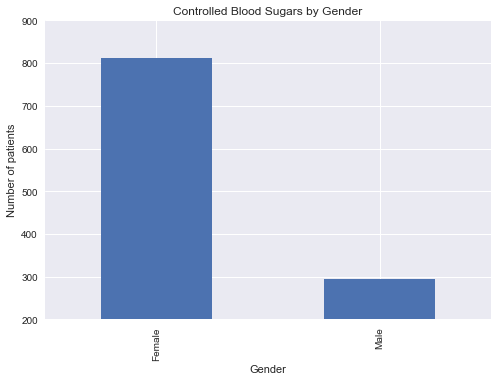

In [3]:
# Checking for patients with blood sugars in range
# pull df with healthy BG ranges
inRange = df.query("Glucose >= 90 and Glucose <= 150")

# count healthy BG levels found amongst gender
rangePlot = pd.pivot_table(inRange, values='Glucose', index='Gender', aggfunc='count')

# display df
display(rangePlot)

# Bar graph to represent gender counts
rangePlot.plot(
    kind='bar', legend=False, ylabel='Number of patients', 
    title='Controlled Blood Sugars by Gender', ylim=(200, 900));

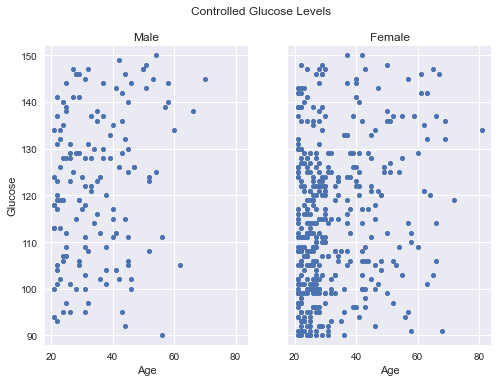

In [10]:
# Scatter plots
fig, (ax, ax2) = plt.subplots(ncols=2, sharey=True, sharex=True)
fig.suptitle('Controlled Glucose Levels')
ax.title.set_text('Male')
ax2.title.set_text('Female')

inRange.query("Gender == 'Male'").plot.scatter(x='Age', y='Glucose', ylim=(88,152),ax=ax)
inRange.query("Gender == 'Female'").plot.scatter(x='Age', y='Glucose', ylim=(88,152), ax=ax2)
plt.show()

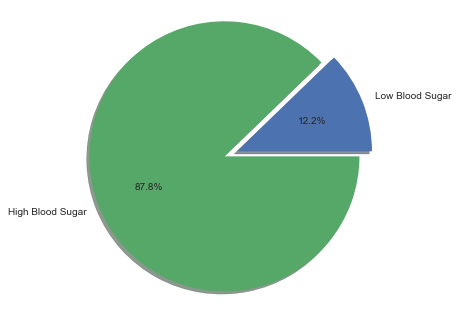

,Sno,Gender,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes Pedigree Function,Body temperature,Oxygen levels,Age,Diabetic,Covid-19
62,63,Female,5,44.0,62,0,0,25.0,0.587,106,99,36,0,0
876,877,Female,5,44.0,62,0,0,25.0,0.587,106,99,36,0,0
680,681,Female,2,56.0,56,28,45,24.2,0.332,108,91,22,0,0
1494,1495,Female,2,56.0,56,28,45,24.2,0.332,108,91,22,0,0
146,147,Female,9,57.0,80,37,0,32.8,0.096,106,99,41,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,580,Male,0,197.0,70,99,0,34.7,0.575,104,90,62,1,1
561,562,Male,0,198.0,66,32,274,41.3,0.502,109,89,28,1,1
1375,1376,Male,0,198.0,66,32,274,41.3,0.502,109,89,28,1,1
1475,1476,Male,1,199.0,76,43,0,42.9,1.394,103,85,22,1,1


In [11]:
# Uncontrolled patients
outRange = df.query("Glucose <= 70 or Glucose >= 170")
outRange.describe()['Glucose']
outRange = outRange.sort_values(by='Diabetic', ascending=False).sort_values(by='Glucose', ascending='True')
outRange.head()

lowBG = outRange.query('Glucose <= 70')
highBG = outRange.query('Glucose >= 170')
fig, ax = plt.subplots()

ax.pie([lowBG.shape[0], highBG.shape[0]], 
       labels=['Low Blood Sugar','High Blood Sugar'],
       autopct='%1.1f%%',
       explode=[0.1,0],
       shadow=True)
ax.axis('equal')
plt.show()
outRange.sort_values(by='Glucose', ascending=True)

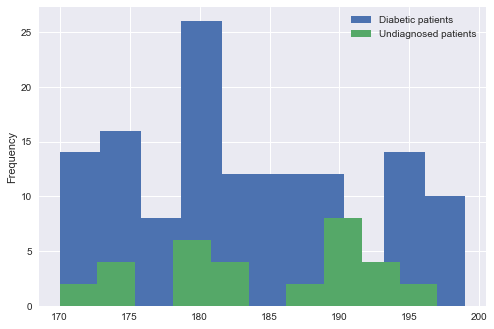

In [12]:
diabetics = highBG.query("Diabetic == 1")
nonDiabetics = highBG.query("Diabetic == 0")

dGlucose = diabetics.rename(columns={'Glucose':'Diabetic patients'})
nonDGlucose = nonDiabetics.rename(columns={'Glucose':'Undiagnosed patients'})

dGlucose['Diabetic patients'].plot.hist(bins=10, legend=True)
nonDGlucose['Undiagnosed patients'].plot.hist(bins=10, legend=True);